In [70]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [71]:
np.set_printoptions(threshold=sys.maxsize)

plt.rcParams["figure.figsize"] = (15,15)

In [72]:
alpha = 0.5
epsilon = 10e-3

In [73]:
def f(x, y):

    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x >= -y)
    z[condition1] = 2*x[condition1] + y[condition1]
    
    condition2 = np.logical_and(x <= 0, x <= y)
    z[condition2] = -2*x[condition2] + y[condition2]

    condition3 = np.logical_and(x >= y, x <= -y)
    z[condition3] = -y[condition3]
    
    return z

In [74]:
'''
t – vector of points
t_k = (u_k, v_k)

p – vector of coefficients
sum(p1,...,pn) = 1

alpha > 0
'''
def f_a(x, y, t, p, alpha):
    f_a = np.zeros_like(x)
    s = np.zeros_like(x)
    
    # TODO: Optimize
    #for i in range(0, len(x)):
    #    for j in range(0, len(t)):
    #        f_a[i] += f(x[i] - t[j,0]*alpha, y[i] - t[j,1]*alpha) * p[j]
            #f_a[i] = np.sum(f(x[i] - t[j,0]*alpha, y[i] - t[j,1]*alpha) * p)
    #f_a = np.sum(f(x - t[:,0]*alpha, y - t[:,1]*alpha) * p[:])
    
    #f_a = [np.sum(f(x[i] - t[:,0]*alpha, y[i] - t[:,1]*alpha) * p) for i in range(0, len(x))]
    #f_a = list(map(lambda i,j : np.sum(f(i - t[:,0]*alpha, j - t[:,1]*alpha) * p), x, y))
    for i in range(0,len(t)):
        f_a += f(x[:]-t[i,0]*alpha, y[:]-t[i,1]*alpha) * p[i]

    return f_a

In [75]:
def calc_f(t, p, alpha):
    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    z = []

    X, Y = np.meshgrid(x, y)

    zs = np.array(f(np.ravel(X), np.ravel(Y)))
    Z = zs.reshape(X.shape)
    
    zs_a = np.array(f_a(np.ravel(X), np.ravel(Y), t, p, alpha))
    Z_a = zs_a.reshape(X.shape)
    
    return Z, Z_a

def find_min(Z, Z_alpha, print_result=False):
    u, c = np.unique(Z_alpha, return_counts=True)
    dup = u[c > 1]

    Z_min = Z.min()
    Z_a_min = Z_alpha.min()

    duplicate_min = np.any(dup == Z_a_min)
    
    if print_result:
        print('Z_min =', Z_min)
        print('Z_a_min =', Z_a_min)

        print()

        print('Preserves min =', not duplicate_min)
    
    return Z_a_min, not duplicate_min

In [76]:
def plot_surface(t, p, alpha, xy_angle = 0, z_angle = 0, title = ''):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    ax.view_init(xy_angle, z_angle)

    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    z = []

    X, Y = np.meshgrid(x, y)

    zs = np.array(f_a(np.ravel(X), np.ravel(Y), t, p, alpha))
    Z = zs.reshape(X.shape)

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}')

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    return Z

Z_min = 0.010101010101010055
Z_a_min = 0.7999999999999999

Preserves min = False


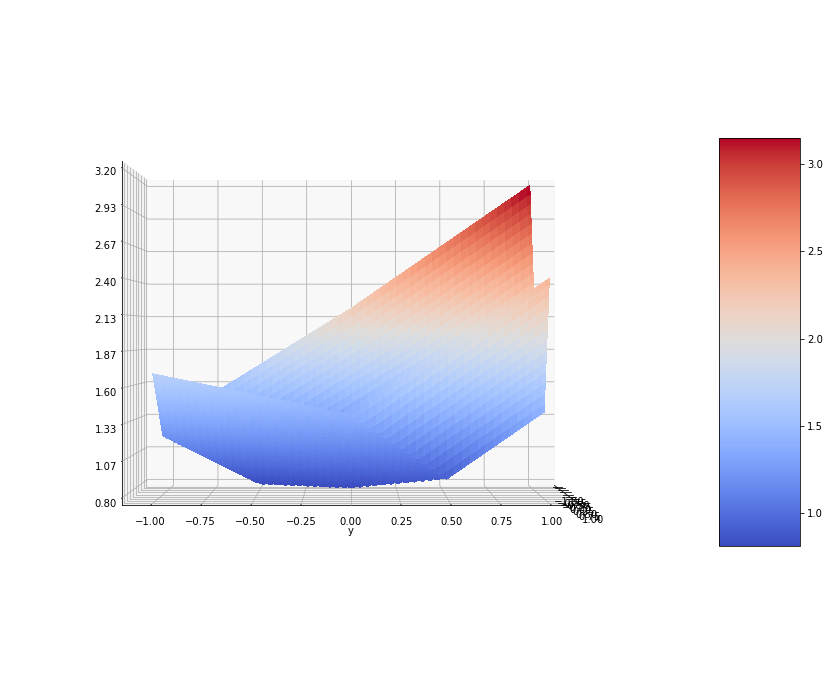

In [77]:
t = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
p = np.array([0.65, 0.05, 0.05, 0.25])

Z, Z_a = calc_f(t, p, alpha)
a_min, preserves = find_min(Z, Z_a, True)

_ = plot_surface(t, p, alpha, 0, 0)

In [78]:
def test_measures(t, alpha, xy_angle = 0, z_angle = 0):
    p1 = p2 = p3 = 0.0
    p4 = 0.25
    
    p_dif = 1 - p4
    
    step = 0.005
    
    X = Y = Z = np.array([])
    
    X_good = np.array([])
    Y_good = np.array([])
    Z_good = np.array([])
    
    X_bad = np.array([])
    Y_bad = np.array([])
    Z_bad = np.array([])
    
    for p1 in np.arange(step, p_dif, step):
        for p2 in np.arange(step, p_dif - p1, step):
            
            p3 = p_dif - p2 - p1
            
            X = np.append(X, p1)
            Y = np.append(Y, p2)
            Z = np.append(Z, p3)

            #print('p =', f'{p1:.2f}', f'{p2:.2f}', f'{p3:.2f}', f'{p4:.2f}')
            
            Z_f, Z_a = calc_f(t, np.array([p1, p2, p3, p4]), alpha)
            a_min, preserves = find_min(Z_f, Z_a)

            if preserves:
                X_good = np.append(X_good, p1)
                Y_good = np.append(Y_good, p2)
                Z_good = np.append(Z_good, p3)
            else:
                X_bad = np.append(X_bad, p1)
                Y_bad = np.append(Y_bad, p2)
                Z_bad = np.append(Z_bad, p3)
            #    print('p =', f'{p1:.2f}', f'{p2:.2f}', f'{p3:.2f}', f'{p4:.2f}')

    P_bad = np.stack((X_bad, Y_bad, Z_bad), axis=-1)
    #print(P_bad)
    
    col = ['green' if X[i] in X_good and Y[i] in Y_good and Z[i] in Z_good  else 'red' for i in range(0, X.size)]
    
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(xy_angle, z_angle)
    
    ax.scatter(X, Y, Z, c=col)
    
    ax.set_xlabel('p1')
    ax.set_ylabel('p2')
    ax.set_zlabel('p3')

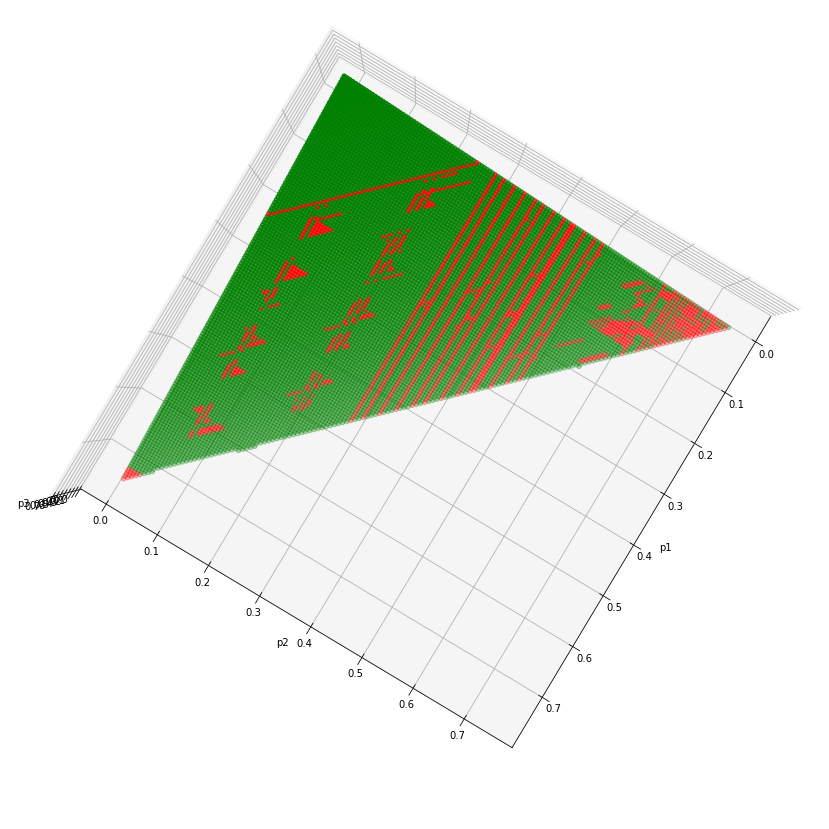

In [79]:
xy_angle = 90
z_angle = 30

test_measures(t, alpha, xy_angle, z_angle)